<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Prachiti Atigre <br>
<b>NetID</b>: pka24 <br>
<b>Recitation (1,2,3)</b>: 2<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: PA (eg: AG for Andy Guna)


<h3>Grader Notes</h3>
<b>Your Grade<b>:59/60<br>
<b>Grader Initials</b>:YM<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Spring 2022

# Lab 2: Processing and analyzing large data sets

### Due Date : Thursday February 17, 2022 by 11:59 PM

### Instructions


This is lab on using Python/Pandas to process large data sets to discover information about the data set. The purpose of this lab is to learn how to use some basic commands in Pandas in your data science projects. We will also do some data analysis with a real dataset of babynames. This lab is presented as a Jupyter notebook. 
Please execute the cells (SHIFT-ENTER) that are already completed and then your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###


[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will learn commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (ie. selecting rows and columns)
* Filtering data (using boolean arrays)
* Data Aggregation/Grouping dataframes
* Merging dataframes

In this lab, you are going to use several pandas methods like `drop()`, `loc[]`, `groupby()`. You may press `shift+tab` on the method parameters to see the documentation for that method.

**A note**: Pandas operations can be confusing at times and the documentation may not be that great, but it is OK to be stumped when figuring out why a piece of code is not doing what it's supposed to. We don't expect you to memorize all the different Pandas functions for any reason, just know the basic ones like `iloc[]`, `loc[]`, slicing, and other general dataframe operations. For exams and quizzes, you will get a Pandas cheat sheet that can be used.

Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!  You need to learn how to read documentation.

## Setup
The first step in this lab is to setup the environment. We will read in pandas, numpy and matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Creating DataFrames & Basic Manipulations

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a two-dimensional labeled data structure with columns of potentially different types.

The pandas [`DataFrame` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) provides at least two syntaxes to create a data frame.

**Syntax 1: ** You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [2]:
president_info = pd.DataFrame(
    data={'president': ['obama', 'bush', 'trump', 'biden'],
          'party': ['democrat', 'republican', 'republican', 'democrat']
          })
president_info

,president,party
0,obama,democrat
1,bush,republican
2,trump,republican
3,biden,democrat


**Syntax 2: ** You can also define a dataframe by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [3]:
president_info = pd.DataFrame(
    [("obama", "democrat"), ("bush", "republican"), ("trump", "republican"),
     ("biden", "democrat")], 
    columns = ["president", "party"])
president_info

,president,party
0,obama,democrat
1,bush,republican
2,trump,republican
3,biden,democrat


You can obtain the dimensions of a data frame by using the shape attribute dataframe.shape

In [4]:
(num_rows, num_columns) = president_info.shape
num_rows, num_columns

(4, 2)

# Task 1 - Panda Basics

### Activity 1.1 - adding columns

You can add a column by `dataframe['new column name'] = [data]`. Please add a column called `votes` to the `president_info` table which contains a 52%,49%,46%, or 51% based on your personal preference ordering for each fruit. 


In [5]:
### BEGIN SOLUTION
president_info['votes'] = ['52%','49%','46%','51%']
### END SOLUTION

In [6]:
# print the data frame to see if the column has been added
president_info

,president,party,votes
0,obama,democrat,52%
1,bush,republican,49%
2,trump,republican,46%
3,biden,democrat,51%


In [7]:
# insert a new row for any president other than the one listed here
### BEGIN SOLUTION
lengthOfDataFrame = president_info.shape[0]
president_info.loc[lengthOfDataFrame] = ['kennedy', 'democrat', '51%']
president_info
### END SOLUTION

,president,party,votes
0,obama,democrat,52%
1,bush,republican,49%
2,trump,republican,46%
3,biden,democrat,51%
4,kennedy,democrat,51%


In [8]:
### BEGIN SOLUTION
# complete the assert statements below
assert president_info["votes"].dtype == 'O'
assert len(president_info["votes"].dropna()) == 5
### END SOLUTION

### Activity 1.2 - adding columns II

You can ALSO add a column by `dataframe.loc[:, 'new column name'] = [data]`. This way to modify an existing dataframe is preferred over the assignment above. In other words, it is best that you use `loc[]`. Although using `loc[]` is more verbose, it is faster. (However, this tradeoff is more likely to be valuable in production software than during interactive use.) In lecture we will explain in more detail what `loc[]` does, but essentially, the first parameter is for the rows and second is for columns. The `:` means keep all rows and the `new column name` indicates the column you are modifying or in this case adding. 

Please add a column called `rank` to the `president_info` table which contains a 1,2,3,4,5 or based on your personal preference ordering for each president (it is perfectly fine to be random here). Use the loc to do this.


In [9]:
### BEGIN SOLUTION
president_info.loc[:, 'rank'] = [1, 2, 5, 4, 3]
### END SOLUTION

In [10]:
president_info

,president,party,votes,rank
0,obama,democrat,52%,1
1,bush,republican,49%,2
2,trump,republican,46%,5
3,biden,democrat,51%,4
4,kennedy,democrat,51%,3


In [11]:
### BEGIN SOLUTION
# complete the assert statements below
assert president_info["rank"].dtype == 'int64'
assert len(president_info["rank"].dropna()) == 5
### END SOLUTION

### Activity 1.3 - dropping columns

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) the both the `votes` and `rank` columns you created and make a new dataFrame called president_info_new. (Make sure to use the `axis` parameter correctly) 

Hint: Look through the documentation to see how you can drop multiple columns of a Pandas dataframe at once, it may involve a list.

In [12]:
### BEGIN SOLUTION
president_info_new = president_info.drop(['votes', 'rank'], axis=1)
### END SOLUTION

In [13]:
president_info_new

,president,party
0,obama,democrat
1,bush,republican
2,trump,republican
3,biden,democrat
4,kennedy,democrat


In [14]:
### BEGIN SOLUTION
# complete the assert statements below
assert president_info_new.shape[1] == 2
### END SOLUTION

### Activity 1.4 - Renaming columns

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) the columns of `president_info_new` so they begin with a capital letter. Set the `inplace` parameter correctly to change the `president_info_new` dataframe. (**Hint:** in Question 2, `drop` creates and returns a new dataframe instead of changing `president_info` because `inplace` by default is `False`)

In [15]:
### BEGIN SOLUTION
president_info_new.rename(columns={'president':'President','party':'Party'} , inplace=True) 
### END SOLUTION

In [16]:
president_info

,president,party,votes,rank
0,obama,democrat,52%,1
1,bush,republican,49%,2
2,trump,republican,46%,5
3,biden,democrat,51%,4
4,kennedy,democrat,51%,3


In [17]:
### BEGIN SOLUTION
# complete the assert statements below
assert president_info.columns[0] == 'president'
assert president_info.columns[1] == 'party'
### END SOLUTION

# Task 2 - Babyname case study
Now that we have learned the basics of data frames, let's move on to a babynames dataset. The babynames data set contains babynames from all states. We will clean and wrangle a data frame with babynames data for the remainder of this lab.

## Helper Function
### `fetch_and_cache` Helper

Downloading large files take time. If you have to download the file everytime you execute this notebook, things can be slow and inefficient. To do this task once, we will use the following function for downloading and caching the data in the `data/` directory and returns the `Path` to the downloaded file. We can use this function throughout the course, so that we save the download bandwidth. This function checks the local data directory for the file name, before attempting to download. Note that, going forward, we will maintain a "data" folder in our lab working folder. 

In [18]:
# Author: Berkeley Data Science Group
def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path object representing the file.
    """
    import requests
    from pathlib import Path
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        birth_time = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded:", birth_time)
    return file_path

Let us step through the above function and identify some of the key lines.

In Python, whenever you want to check if a file exists in a certain path, it is not sufficient to just have the string representation of the path, you need to create a Path object usign the `Path()` constructor. Essentially, after the Path object is created for the directory, a directory is created at that path location using the `mkdir()` method. Then, within the directory, a path for the file itself is created and if the path has already been linked (a.k.a file has already been created and put in the directory), then a new one is not created and instead uses the cached version.

The function `exists()` in the code above is one way to check if a file exists at a certain path when called on a path object. There is also another way this can be done using the `os` library in Python. If you decided to use the `os` library, you wouldn't need to create a Path object and rather pass in the the string representation of the path.

Now, going back to the code, if the path hasn't been linked, then the file is downloaded and created at the path location. 

The benefit of this function is that not only can you force when you want a new file to be downloaded using the `force` parameter, but in cases when you don't need the file to be re-downloaded, you can use the cached version and save download time.

Below we use fetch and cache to download the `namesbystate.zip` zip file. 

**This might take a little while!**

First let's run the following cells to build the dataframe `baby_names`.
The cells below download the data from the web and extract the data in a New Jersey region. There should be a total of ???  records.

## Activity 2.1-  Download Babynames Data Set
The zip file is approximately 21 MB. It might take a little time to download.But once you downloaded, it should always be available in the data folder for your lab.

In [ ]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
# use fetct_and_cache to avoid multiple downloads.
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

The following cell builds the final full `baby_names` DataFrame. Here is documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.concat.html) if you want to know more about its functionality. 


In [19]:
import zipfile
namesbystate_path = 'namesbystate.zip'
zf = zipfile.ZipFile(namesbystate_path, 'r')

field_names = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=field_names)

# List comprehension
states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = pd.concat(states).reset_index(drop=True)

In [20]:
# print key information about this data frame
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [21]:
# find the number of records in the file. Change the number 6215834 if the data file has been changed
assert(len(baby_names) == 6215834)   # if you get an error, you need to change the number

In [22]:
## write a one line of code to know how many babies were born in AK named Mary in 1910? Hint: use groupby and 
# get_grouo methods
### BEGIN SOLUTION
(baby_names.groupby(['State']).get_group('AK').groupby(['Name']).get_group('Mary').groupby(['Year']).get_group(1910)).iloc[0,4]
### END SOLUTION

14

## Activity 2.2 - Slicing Data Frames - Selecting rows and columns


### Selection Using Label

**Column Selection** 
To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage looks like `frame.loc[rowname,colname]`. (Reminder that the colon `:` means "everything").  For example, if we want the `color` column of the `ex` data frame, we would use : `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would give select the columns `Name` and the columns after.

- *Alternative:* While `.loc` is invaluable when writing production code, it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `frame['colname']`.

**Row Selection**
Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [23]:
# Select rows 2:5 and the column 'Name'
### BEGIN SOLUTION
baby_names.loc[2: 5,'Name']
### END SOLUTION

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [24]:
# Select rows 2:5 and column names using a list ['name']
### BEGIN SOLUTION
baby_names.loc[2: 5,['Name']]
### END SOLUTION

,Name
2,Anna
3,Margaret
4,Helen
5,Elsie


The `.loc` actually uses the Pandas row index rather than row id/position of rows in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 


There is another Pandas slicing function called `iloc[]` which lets you slice the dataframe by row id and column id instead of by column name and row index (for `loc[]`). This is really the main difference between the 2 functions and it is important that you remember the difference and why you might want to use one over the other. 

In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Name` column of the `baby_names` dataframe using both `iloc[]` and `loc[]`. Observe the difference.

In [25]:
# Select row indices 1:4 and column idex 3 using iloc
### BEGIN SOLUTION
baby_names.iloc[1: 4, 3]
### END SOLUTION

1       Annie
2        Anna
3    Margaret
Name: Name, dtype: object

In [26]:
# select row indices 1:3 and column "name" using loc
### BEGIN SOLUTION
baby_names.loc[1: 3, 'Name']
### END SOLUTION

1       Annie
2        Anna
3    Margaret
Name: Name, dtype: object

Lastly, we can change the index of a dataframe using the `set_index` method.

In [27]:
# Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name") 
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


We can now lookup rows by name directly:

In [28]:
df.loc[['Mary', 'Anna'], :]

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [29]:
# Example: 
# df.loc[2:5,"Year"] You can't do this
df.iloc[1:4,2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


## Activity 2.3
Selecting multiple columns is easy.  You just need to supply a list of column names.  Select the `Name` and `Year` **in that order** from the `baby_names` table.

In [30]:
### BEGIN SOLUTION
name_and_year = baby_names.loc[:,['Name','Year']]
### END SOLUTION

In [31]:
name_and_year.shape

(6215834, 2)

In [32]:
### BEGIN SOLUTION
# complete the assert statements below
assert name_and_year.shape == (6215834,2)
assert name_and_year.loc[0,"Name"] == 'Mary'
assert name_and_year.loc[0,"Year"] == 1910
### END SOLUTION

As you may have noticed above, the .loc() method is a way to re-order the columns within a dataframe.

## Activity 2.4 - Filtering Data

### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, culling out fishy outliers, or analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df[column name] < 5]]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
>=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in New Jersey

In [33]:
### BEGIN SOLUTION
# construct a DataFrame containing only the names registered in NJ. 
# The table below shows the expected answer.
nj = baby_names[baby_names['State'] == 'NJ']
nj
### END SOLUTION

,State,Sex,Year,Name,Count
3666080,NJ,F,1910,Mary,593
3666081,NJ,F,1910,Helen,438
3666082,NJ,F,1910,Anna,355
3666083,NJ,F,1910,Margaret,311
3666084,NJ,F,1910,Elizabeth,260
...,...,...,...,...,...
3823186,NJ,M,2020,Zahid,5
3823187,NJ,M,2020,Zakaria,5
3823188,NJ,M,2020,Zen,5
3823189,NJ,M,2020,Ziad,5


## Activity 2.5
Select the names in Year 2000 (for all baby_names) that have larger than 3000 counts. What do you notice?

(If you use `p & q` to filter the dataframe, make sure to use `df[df[(p) & (q)]]` or `df.loc[df[(p) & (q)]])`

**Remember** that both slicing and using `loc` will achieve the same result, it is just that `loc` is typically faster in production. You are free to use whichever one you would like.

In [34]:
### BEGIN SOLUTION
result = baby_names[(baby_names['Year'] == 2000) & (baby_names['Count'] > 3000)]
### END SOLUTION

In [35]:
result

,State,Sex,Year,Name,Count
725638,CA,M,2000,Daniel,4342
725639,CA,M,2000,Anthony,3839
725640,CA,M,2000,Jose,3804
725641,CA,M,2000,Andrew,3600
725642,CA,M,2000,Michael,3572
725643,CA,M,2000,Jacob,3520
725644,CA,M,2000,Joshua,3356
725645,CA,M,2000,Christopher,3336
725646,CA,M,2000,David,3280
725647,CA,M,2000,Matthew,3254


In [36]:
### BEGIN SOLUTION
# complete the assert statements below
assert len(result) == 11
assert result["Count"].sum() == 39000
assert result["Count"].iloc[0] == 4342
### END SOLUTION


## Activity 2.6 - Data Aggregration (Grouping Data Frames)

To count the number of instances of each unique value in a `Series`, we can use the `value_counts()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) as `df["col_name"].value_counts()`. Count the number of different names for each Year in `NJ` (New Jersey).  (You may use the `nj` DataFrame created above.)

**Note:** *We are not computing the number of babies but instead the number of names (rows in the table) for each year.*

In [37]:
### BEGIN SOLUTION
num_of_names_per_year = nj['Year'].value_counts()
### END SOLUTION

In [38]:
num_of_names_per_year[:5]

2007    2567
2008    2536
2009    2530
2014    2513
2019    2498
Name: Year, dtype: int64

In [39]:
### BEGIN SOLUTION
# complete the assert statements below
assert num_of_names_per_year[2007] == 2567
assert num_of_names_per_year[:5].sum() == 12644
assert num_of_names_per_year[1910] == 348
assert num_of_names_per_year[:15].sum() == 37454
### END SOLUTION

## Activity 2.7 - Gender Counts
Count the number of different names for each gender in `NJ`. 

In [40]:
### BEGIN SOLUTION
num_of_names_per_gender = nj['Sex'].value_counts()
### END SOLUTION

In [41]:
num_of_names_per_gender

F    89117
M    67994
Name: Sex, dtype: int64

In [42]:
### BEGIN SOLUTION
# fix the errors in these assertions
assert num_of_names_per_gender["F"] > 89116
assert num_of_names_per_gender["F"] == 89117
assert num_of_names_per_gender["M"] == 67994
### END SOLUTION

### Activity 2.7.1

Let's move back to baby names and specifically, the `nj` dataframe. Find the sum of `Count` for each `Name` in the `nj` table. You should use `df.groupby("col_name").sum()`. Your result should be a Pandas Series.

**Note:** *In this question we are now computing the number of registered babies with a given name.*

In [43]:
### BEGIN SOLUTION
count_for_names = nj.groupby('Name')['Count'].sum()
### END SOLUTION

In [44]:
count_for_names.sort_values(ascending=False)[:5]

Name
John       198025
Robert     172246
Michael    169300
Joseph     137027
William    133075
Name: Count, dtype: int64

In [45]:
### BEGUN SOLUTION
# fix the assertion errors
assert count_for_names["Michael"] == 169300
assert count_for_names[:100].sum() == 33364
assert count_for_names["David"] == 98439
assert count_for_names[:1000].sum() == 838569
### END SOLUTION

### Activity 2.7.2
Find the sum of `Count` for each female name after year 1999 (`>1999`) in New Jersey.

In [46]:
### BEGIN SOLUTION
female_name_count = nj[(nj['Year'] > 1999) & (nj['Sex'] == 'F')].groupby('Name')['Count'].sum()
### END SOLUTION

In [47]:
female_name_count.sort_values(ascending=False)[:5]

Name
Isabella    11350
Emily       10943
Olivia      10907
Sophia      10060
Emma         9813
Name: Count, dtype: int64

In [48]:
### BEGIN SOLUTION
# fix the assertion errors
assert female_name_count["Emily"] == 10943
assert female_name_count[:100].sum() == 20920
assert female_name_count["Isabella"] == 11350
assert female_name_count[:10000].sum() == 807711
### END SOLUTION

## Activity 2.7.3 - Estimating Gender Counts using gender_guessor
We looked at a gender_guessor program (file given in CANVAS NOTEBOOK FILES).
In the original baby names data frame, we have the correct counts of genders (M,F). Write the code below to use the gender_guessor code to see how many genders are guessed correctly by the gender_guessor program. The correctness of gender_guessor can be assesed by the percentage of genders the preditor accurately predicts. For example, if the predictor correctly estimate 60 out of 100, then the accuracy of the predictor is 60%. If the gender_guessor estimate a name as "mostly female", count it as "female". Similary, "mostly male" would be considered "male". Write the code below to estimate the predictor accuracy.

In [49]:
!pip install gender-guesser

In [50]:
### BEGIN SOLUTION
import gender_guesser.detector as gender
d = gender.Detector()

female_count = 0

female = baby_names[baby_names['Sex'] == 'F']
len_of_total_female = len(female)
len_of_total_female

for idx, female in female['Name'].iteritems():
    gen = d.get_gender(female)
    if gen == 'female' or gen == 'mostly_female' or gen == 'an·drog·y·nous':
        female_count = female_count + 1

female_predictor_accuracy = female_count/len_of_total_female

male_count = 0

male = baby_names[baby_names['Sex'] == 'M']
len_of_total_male = len(male)
len_of_total_male

for idx, male in male['Name'].iteritems():
    gen = d.get_gender(male)
    if gen == 'male' or gen == 'mostly_male' or gen == 'an·drog·y·nous':
        male_count = male_count + 1

male_predictor_accuracy = male_count/len_of_total_male

print('Female Accuracy: ' +str(female_predictor_accuracy*100)+ '%')
print('Male Accuracy: ' +str(male_predictor_accuracy*100)+ '%')
### END SOLUTION

Female Accuracy: 81.13948828588838%
Male Accuracy: 85.20378805084887%


In [ ]:
# * -1pt for counting repeated names

## Analysis
Based on percentages you see above, why would one be higher or lower than the other? This is only a speculation and all answers are accepted.

#### begin answer
There are multiple reasons for why one percentage would be higher or lower than the other. In the above dataset, there is a female accuracy of 81.14% and male accuracy of 85.20%. This could be because there are lower number of female names in the dataset or because male names are easier to detect than male names.
#### end answer

## Activity 2.8 - Most Popular Names

#### Part 1 What is the most popular female name and male name in any given year for a given state?
Complete a function def most_popular(year, state) that takes a year and a state and return this list.


In [51]:
### BEGIN SOLUTION
def most_popular(year,state):
    #function_body
    most_popular_female = baby_names[(baby_names['Year'] == year) & (baby_names['State'] == state) & (baby_names['Sex'] == 'F')].groupby('Name')['Count'].sum().idxmax()
    most_popular_male = baby_names[(baby_names['Year'] == year) & (baby_names['State'] == state) & (baby_names['Sex'] == 'M')].groupby('Name')['Count'].sum().idxmax()
    print(most_popular_female)
    print(most_popular_male)
### END SOLUTION

In [52]:
### BEGIN SOLUTION
# PART 1 : using the function find the most popular male and female names
# in NJ for year 2000

year = 2000
state = 'NJ'
most_popular(year,state)

### END SOLUTION

Emily
Michael


#### Part 2 What is the most popular female and male name across all years and all states?

In [53]:
### BEGIN SOLUTION
most_popular_female = baby_names[(baby_names['Sex'] == 'F')].groupby('Name')['Count'].sum().idxmax()
most_popular_male = baby_names[(baby_names['Sex'] == 'M')].groupby('Name')['Count'].sum().idxmax()
print(most_popular_female)
print(most_popular_male)
### END SOLUTION

Mary
James


## Activity 2.9 Can you deduce birth sex from the last letter of a person’s name?
This is an open ended activity. We would like you to think about how to answer this question. There can be many ways to do this. 
If you can plot a graph like this, you might be able to answer the question. The x-axis is the probability that a name stars with a letter (y-axis) The plot is done using https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html

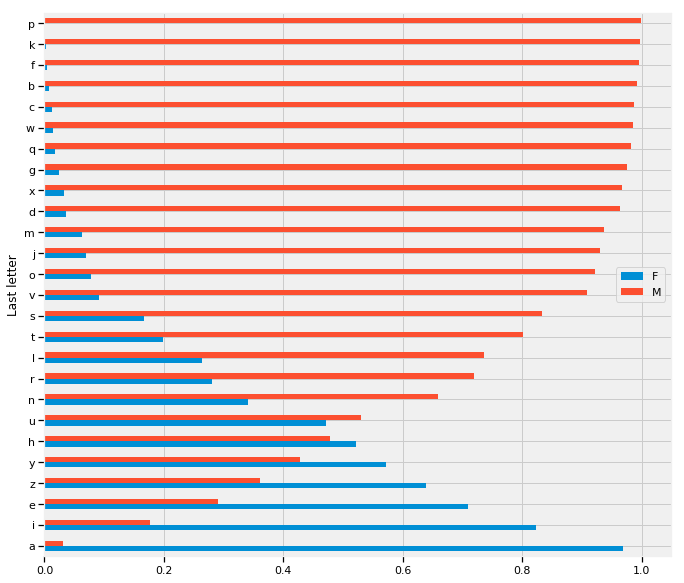

Text(0, 0.5, 'Last Letter')

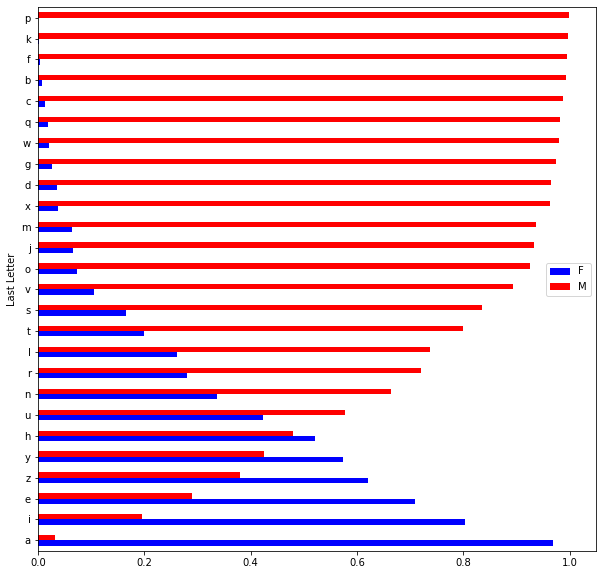

In [54]:
# your code to plot the graph as shown below (you need to consider all states, all years data)
### BEGIN SOLUTION
baby_names['Letter'] = baby_names['Name'].str[-1]

letter = baby_names.pivot_table(values = 'Count', index = 'Letter', columns = 'Sex', aggfunc = sum)
letter['total'] = letter.sum(axis=1)

female_last_letter = letter['F']
male_last_letter = letter['M']
total_last_letter = letter['total']

female_percent = female_last_letter / total_last_letter
male_percent = male_last_letter / total_last_letter

finalLetter = pd.DataFrame({'F': female_percent, 'M': male_percent})

finalLetter.sort_values('M').plot(kind = 'barh', figsize=(10,10), color={'F': 'blue', 'M': 'red'}).set_ylabel("Last Letter")
### END SOLUTION

## Activity 2.10 What is your analysis of the question in Activity 2.9?

#### BEGIN SOLUTION
Please edit this markdown cell

From activity 2.9, I am able to conclude that most female names end with the letters a, i, e, z and y whereas most male names end with the letters p, k, f, b and c. From this we can also conclude that almost no female names end in the letters p and k.
We can also conclude that there is almost an equal amount of male and female names that end with the letters h and u.
#### END SOLUTION

# Task 3 - Working with Movies
In this example, we will work with the movies.csv file

In this task we will use `groupby`. But before we jump into using the `groupby` function in Pandas, let's recap how grouping works in general for tabular data through a guided set of questions based on a **small** toy dataset of movies and genres. 

**Note:** If you want to see a visual of how grouping of data works, see "week 01 - Notebook" in the notebooks folder

**Problem Setting:** The summer 2018, there were a lot of good and bad movies that came out. Below is a dataframe with 5 columns: name of the movie as a `string`, the genre of the movie as a `string`, the first name of the director of the movie as a `string`, the average rating out of 10 on Rotten Tomatoes as an `integer`, and the total gross revenue made by the movie as an `integer`. The point of these guided questions (parts a and b) below is to understand how grouping of data works in general, **not** how grouping works in code. 

Below is the `movies` dataframe we are using, imported from the `movies.csv` file located in the `lab02` directory.

In [55]:
movies = pd.read_csv("movies.csv")
movies

,director,genre,movie,rating,revenue
0,David,Action & Adventure,Deadpool 2,7,318344544
1,Bill,Comedy,Book Club,5,68566296
2,Ron,Science Fiction & Fantasy,Solo: A Star Wars Story,6,213476293
3,Baltasar,Drama,Adrift,6,31445012
4,Bart,Drama,American Animals,6,2847319
5,Gary,Action & Adventure,Oceans 8,6,138803463
6,Drew,Action & Adventure,Hotel Artemis,8,6708147
7,Brad,Animation,Incredibles 2,5,594398019
8,Jeff,Comedy,Tag,6,54336863
9,J.A.,Science Fiction & Fantasy,Jurassic World: Fallen Kingdom,6,411873505


## Activity 3.1

If we grouped the `movies` dataframe above by `genre`, how many groups would be in the output and what would be the groups? Assign `num_groups` to the number of groups created and fill in `genre_list` with the names of genres as strings that represent the groups.

In [56]:
### BEGIN SOLUTION
num_groups = len(movies.groupby('genre'))
genre_list = movies['genre'].unique()
### END SOLUTION

In [57]:
assert num_groups == 6
assert set(genre_list) == set(['Action & Adventure', 'Comedy', 'Science Fiction & Fantasy', 'Drama', 'Animation', 'Horror'])

## Activity 3.2

Whenever we group tabular data, it is usually the case that we need to aggregate values from the ungrouped column(s). If we were to group the `movies` dataframe above by `genre`, which column(s) in the `movies` dataframe would it make sense to aggregate if we were interested in finding how well each genre did in the eyes of people? Fill in `agg_cols` with the column name(s).

In [58]:
### BEGIN SOLUTION
agg_cols = ['rating', 'revenue']
### END SOLUTION

In [59]:
assert set(agg_cols) == set(['rating', 'revenue'])

Now, let's see `groupby` in action, instead of keeping everything abstract. To aggregate data in Pandas, we use the `.groupby()` [function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). The code below will group the `movies` dataframe by `genre` and find the mean/average revenue and rating for each genre. 

In [60]:
# write the code to get the table below
movies.groupby('genre').agg({'rating': 'mean', 'revenue': 'mean'})

,rating,revenue
genre,,
Action & Adventure,6.333333,153569934.5
Animation,5.000000,374408165.0
Comedy,6.000000,56719237.4
Drama,6.000000,17146165.5
Horror,7.000000,68765655.0
Science Fiction & Fantasy,6.000000,312674899.0


## Activity 3.3: Grouping Multiple Columns

Let's look at the `movies` dataframe. Which of the following lines of code will output the following dataframe? Write your answer as either 1, 2, 3, or 4. Recall that the arguments to `pd.pivot_table` are as follows: `data` is the input dataframe, `index` includes the values we use as rows, `columns` are the columns of the pivot table, `values` are the values in the pivot table, and `aggfunc` is the aggregation function that we use to aggregate `values`.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>rating</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>8</th>
    </tr>
    <tr>
      <th>genre</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Action &amp; Adventure</th>
      <td>208681866.0</td>
      <td>129228350.0</td>
      <td>318344544.0</td>
      <td>6708147.0</td>
    </tr>
    <tr>
      <th>Animation</th>
      <td>374408165.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>Comedy</th>
      <td>55383976.0</td>
      <td>30561590.0</td>
      <td>NaN</td>
      <td>111705055.0</td>
    </tr>
    <tr>
      <th>Drama</th>
      <td>NaN</td>
      <td>17146165.5</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>Horror</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>68765655.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>Science Fiction &amp; Fantasy</th>
      <td>NaN</td>
      <td>312674899.0</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>

1) `pd.pivot_table(data=movies, index='genre', columns='rating', values='revenue', aggfunc=np.mean)`

2) `movies.groupby(['genre', 'rating'])['revenue'].mean()`

3) `pd.pivot_table(data=movies, index='rating', columns='genre', values='revenue', aggfunc=np.mean)`

4) `movies.groupby('revenue')[['genre', 'rating']].mean()`

## Activity 3.4

In [61]:
### BEGIN SOLUTION
answer = 1
### END SOLUTION

## Activity 3.5: Merging


Time to put everything together! Merge `movies` and `babynames` to find the number of registered baby names for each director. Only include names that appear in both `movies` and `babynames`.

**Hint:** Take a look at the ``to_frame`` method of a series to do this. 

Your first row should look something like this:

**Note**: It is ok if you have 2 separate columns with names instead of just one column.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>director</th>
      <th>genre</th>
      <th>movie</th>
      <th>rating</th>
      <th>revenue</th>
      <th>Count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>David</td>
      <td>Action &amp; Adventure</td>
      <td>Deadpool 2</td>
      <td>7</td>
      <td>318344544</td>
      <td>371646</td>
    </tr>
  </tbody>
</table>
</table>

In [62]:
### BEGIN SOLUTION
merged_df = pd.merge(movies, baby_names.groupby('Name')['Count'].sum(), left_on='director', right_on='Name')
merged_df
### END SOLUTION

,director,genre,movie,rating,revenue,Count
0,David,Action & Adventure,Deadpool 2,7,318344544,3623464
1,Bill,Comedy,Book Club,5,68566296,154338
2,Ron,Science Fiction & Fantasy,Solo: A Star Wars Story,6,213476293,32780
3,Baltasar,Drama,Adrift,6,31445012,10
4,Bart,Drama,American Animals,6,2847319,12772
5,Gary,Action & Adventure,Oceans 8,6,138803463,899394
6,Drew,Action & Adventure,Hotel Artemis,8,6708147,77409
7,Brad,Animation,Incredibles 2,5,594398019,80133
8,Jeff,Comedy,Tag,6,54336863,114605
9,Charles,Comedy,Uncle Drew,5,42201656,2293389


In [ ]:
### BEGIN SOLUTION
# complete the assertions
assert merged_df.loc[0, 'Count'] == 3623464
assert merged_df.loc[3, 'Count'] == 10
assert merged_df.loc[7, 'Count'] == 80133
assert merged_df['Count'].sum() == 9649094
assert len(merged_df) == 14
### END SOLUTION

## Activity 3.6

How many directors in the original `movies` table did not get included in the `merged_df` dataframe? Please explain your answer in 1-2 sentences.

In [ ]:
### BEGIN SOLUTION
answer = 4
### END SOLUTION

EXPLANATION: 4 directors from the original movies table did not get included in the merged_df dataframe because their legal name might be different from their 'director' name. For example, from the movies table, we can see the director name 'J.A.'. This director's legal name is probably something else, and not J.A. which is why J.A. is not going to be in the baby_names database because of which it didn't get included in the merged table.

## Activity 3.7 (open ended)
The site https://grouplens.org/datasets/movielens/ contains data sets about movies and ratings. This is an open ended activity for you to look into the site and think about some interesting questions you can ask and answer with the data given. Come up with 3 interesting questions and find the answers using data sets given (keep the data set sizes manageable to assure that you can process them locally.)

In [ ]:
#I downloaded the dataset under 'recommended for education and development' named 'ml-latest.zip'

#Q1. How many Toy Story movies were released?
answer = 8

#Q2. How many movies were released in the year 1995 that start with the word 'The'?
answer = 37

## Q3. The userId that watched the most movies, how many movies did he/she watch?
answer = 4874

In [ ]:
#Code for Q1
#movies = pd.read_csv("movies.csv")
#result = movies[(movies['title'].str[:9] == 'Toy Story')]
#len(result)

#Code for Q2
#movies = pd.read_csv("movies.csv")
#movies['year'] = movies['title'].str[-6:]
#movies['firstWord'] = movies['title'].str[:3]
#result = movies[(movies['year'] == '(1995)') & (movies['firstWord'] == 'The')]
#len(result)

#Code for Q3
#ratings = pd.read_csv("ratings.csv")
#highest_watch = ratings.groupby('userId')['movieId'].count()
#highest_watch.sort_values(ascending=False)[:5].to_frame().iloc[0,0]

# Submission Instructions

### Please Remove all output before submission

### File Name: Please name the file in the style (section_netID_Lab2.ipynb) 1_adg133_Lab2.ipynb

### Submit To: Canvas --> Assignments --> Lab2 

Warning: Failure to follow directions may result in loss of points.

## Feedback  (please edit this cell)
Please provide feedback on this lab. Thank you.

1. How would you rate this lab from a scale of 1-10 (10-best?
I would rate this lab a 7/10 because I learned a lot of new concepts but some were a bit difficult to understand

2. What components of the lab you enjoyed the most (if any):
Questions which involved different conditions such as specific name and year were interesting because it was interesting to see how many values were retrieved out of such a large databset.

3. What parts of the lab, you did not find interesting at all? (if any)
Questions that included the use of iloc and loc were a little difficult because of which I did not find them as interesting.

4. What other comments can you provide to improve this lab?
Overall, this lab was interesting. I wish there were a bit more problems on loc and iloc so that I could better understand the concept.

### Rules regarding posting solutions on public sites such as github
The labs are intended **only for students** who are part of the course. As such **no lab or its solution** should be made available on a public sites such as GITHUB. Please contact the instructor for further details of this rule.


@2022 A.D. Gunawardena. Thanks to many people who proof read this lab and provided good feedback. Also thanks to Berkeley Data Science Group (especially Josh Hug) for some of the suggested ideas for this lab. 
IMPORTANT. DO NOT post these labs in public forums such as github or others